In [1]:
import polars as pl
import matplotlib.pyplot as plt
import json

pl.Config().set_tbl_cols(50)

polars.config.Config

In [2]:
#Map route id to correct route name
route_mapping = {
    3: "2L",
    4: "2R",
    33: "3",
    17: "10",
    18: "11",
    23: "12",
    12: "16",
    13: "17",
    14: "18",
    30: "19",
    29: "21",
    38: "21 Tripper",
    777: "777"
}

In [3]:
df = pl.read_parquet("./data/2024-09-entries-start.parquet")
out = df.with_columns(pl.col("routeID").replace_strict(route_mapping))

out 

FileNotFoundError: The system cannot find the path specified. (os error 3): ./data/2024-09-entries-start.parquet

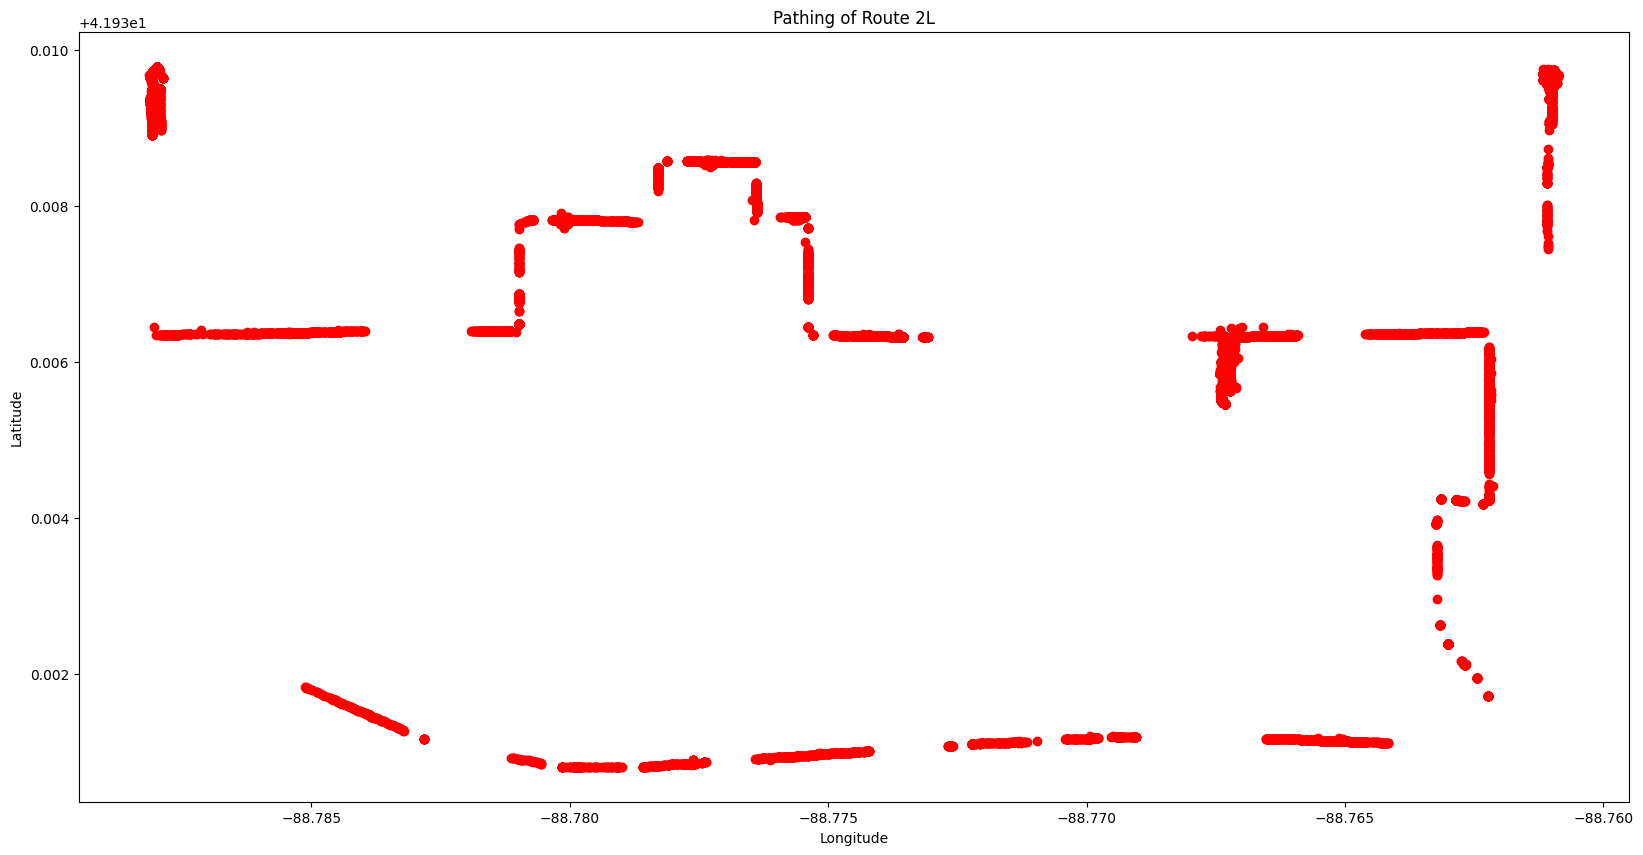

In [ ]:
# Graph route 2L
subset = out.filter((pl.col("routeID") == "2R") & (pl.col("inService") == True))

plt.figure(figsize=(20, 10))
plt.scatter(subset['lng'], subset['lat'], c='red', marker='o')
plt.title('Pathing of Route 2L')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
x = out.filter(pl.col("h") != 0)
x["h"].describe()

statistic,value
str,f64
"""count""",653414.0
"""null_count""",0.0
"""mean""",187.943893
"""std""",112.915712
"""min""",1.0
"""25%""",90.0
"""50%""",182.0
"""75%""",270.0
"""max""",360.0


In [ ]:
x = out.filter((pl.col("routeID") == "2L") & (pl.col("inService") == True))
x

routeID,patternID,equipmentID,tripID,lat,lng,load,capacity,eLoad,blockID,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__
str,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,datetime[ns],str,datetime[ns],cat,i64,i64,i64,f64,bool,i64
"""2L""",3,"""Old_1501""",329,41.93595,-88.76718,0,0,33,0,820,1140,10502,359,431,10503,"""19:00:00-2""",true,1.0,11414,2024-08-31 23:59:49,"""354676050595540""",2024-09-01 00:00:01,"""Outbound""",2,431,820,0.5999745,true,25
"""2L""",3,"""Old_1501""",329,41.93595,-88.76718,0,0,33,0,820,1141,10502,359,431,10503,"""19:00:00-2""",true,0.0,11414,2024-09-01 00:00:00,"""354676050595540""",2024-09-01 00:00:16,"""Outbound""",2,431,820,0.5999745,true,52
"""2L""",3,"""Old_1501""",329,41.93595,-88.76718,0,0,33,0,820,1141,10502,359,431,10503,"""19:00:00-2""",true,0.0,11414,2024-09-01 00:00:20,"""354676050595540""",2024-09-01 00:00:31,"""Outbound""",2,431,820,0.5999745,true,79
"""2L""",3,"""Old_1501""",329,41.93595,-88.76718,0,0,33,0,820,1141,10502,359,431,10503,"""19:00:00-2""",true,0.0,11414,2024-09-01 00:00:40,"""354676050595540""",2024-09-01 00:00:46,"""Outbound""",2,431,820,0.5999745,true,106
"""2L""",3,"""Old_1501""",329,41.93595,-88.76718,0,0,33,0,820,1141,10502,359,431,10503,"""19:00:00-2""",true,0.0,11414,2024-09-01 00:00:50,"""354676050595540""",2024-09-01 00:01:01,"""Outbound""",2,431,820,0.5999745,true,133
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2L""",3,"""902""",329,41.93595,-88.76718,0,16,84,0,820,1140,10502,359,431,10503,"""19:00:00-2""",true,1.0,11414,2024-09-07 23:59:03,"""354676050c652c9""",2024-09-07 23:59:06,"""Outbound""",2,431,820,0.5999745,true,174485
"""2L""",3,"""902""",329,41.93595,-88.76718,0,16,84,0,820,1140,10502,359,431,10503,"""19:00:00-2""",true,1.0,11414,2024-09-07 23:59:13,"""354676050c652c9""",2024-09-07 23:59:21,"""Outbound""",2,431,820,0.5999745,true,174512
"""2L""",3,"""902""",329,41.93595,-88.76718,0,16,84,0,820,1140,10502,359,431,10503,"""19:00:00-2""",true,1.0,11414,2024-09-07 23:59:23,"""354676050c652c9""",2024-09-07 23:59:36,"""Outbound""",2,431,820,0.5999745,true,174539


In [ ]:
#Display all data except blockID and load columns where route is not 777
df = pl.read_parquet("./data/2024-09-entries-start.parquet")
out = df.filter((pl.col("routeID") != 777) & (pl.col("inService") == True)).select(pl.all().exclude("blockID").exclude("load"))

out

routeID,patternID,equipmentID,tripID,lat,lng,capacity,eLoad,nextStopID,nextStopETA,nextPatternStopID,h,lastStopID,lastPatternStopID,scheduleNumber,inService,onSchedule,trainID,receiveTime,aID,captureTime,direction,seq,lastStopExtID,nextStopExtID,nextStopPctProg,atStop,__index_level_0__
i64,i64,str,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,str,bool,f64,i64,datetime[ns],str,datetime[ns],cat,i64,i64,i64,f64,bool,i64
13,13,"""1102""",10058,41.93558,-88.76723,0,237,806,1139,10612,2,805,10611,"""8:00:00-17""",true,-658.0,11606,2024-08-31 11:36:01,"""35467605059a8e2""",2024-09-01 00:00:01,"""Outbound""",2,805,806,100.0,true,18
13,13,"""502""",10078,41.93283,-88.76682,0,54,805,1139,10611,274,0,0,"""18:00:00-17""",true,-59.0,11626,2024-08-31 23:59:46,"""354676050c8621c""",2024-09-01 00:00:01,"""Outbound""",-1,-1,-1,null,false,3
30,33,"""603""",10252,41.93552,-88.77041,0,8,528,1139,11388,201,819,11387,"""33-0831_1""",true,-1.0,11681,2024-08-31 23:59:48,"""35467605059b849""",2024-09-01 00:00:01,"""Outbound""",2,819,528,100.0,true,6
14,14,"""604""",10106,41.94991,-88.72191,0,35,677,1139,10655,42,676,10654,"""14-0831_1""",true,-1.0,11654,2024-08-31 23:59:48,"""354676050810644""",2024-09-01 00:00:01,"""Outbound""",2,676,677,100.0,true,7
12,12,"""72307""",10046,41.93277,-88.76655,0,47,536,1142,10596,265,809,10595,"""12-0831_1""",true,-4.0,11594,2024-08-31 23:59:47,"""354676050c83bf0""",2024-09-01 00:00:01,"""Outbound""",2,809,536,1.400807,true,23
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
13,13,"""701""",10071,41.94421,-88.73624,0,43,568,907,10640,222,567,10639,"""14:30:00-17""",true,0.0,11619,2024-09-07 20:06:05,"""35467605080601a""",2024-09-08 00:54:18,"""Outbound""",30,567,568,0.870088,false,112841
13,13,"""701""",10071,41.94421,-88.73624,0,43,568,907,10640,222,567,10639,"""14:30:00-17""",true,0.0,11619,2024-09-07 20:06:05,"""35467605080601a""",2024-09-08 00:54:33,"""Outbound""",30,567,568,0.870088,false,112868
13,13,"""701""",10071,41.94421,-88.73624,0,43,568,907,10640,222,567,10639,"""14:30:00-17""",true,0.0,11619,2024-09-07 20:06:05,"""35467605080601a""",2024-09-08 00:54:48,"""Outbound""",30,567,568,0.870088,false,112895
